In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from dython.nominal import associations
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('cancellation_prediction.csv')
df.head()

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,...,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
0,Fancy Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,3,No Deposit,NaN,NaN,0,0.0,0,0
1,Fancy Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,4,No Deposit,NaN,NaN,0,0.0,0,0
2,Fancy Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,NaN,NaN,0,75.0,0,0
3,Fancy Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,304.0,NaN,0,75.0,0,0
4,Fancy Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,0,No Deposit,240.0,NaN,0,98.0,0,1


## Procurando por valores faltantes

In [ ]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','NA']
data_missing_value['percentage'] = round((data_missing_value['NA']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,NA,percentage
0,id_person_booking,112593,94.307
1,id_travel_agency_booking,16340,13.686
2,country,488,0.409
3,num_children,4,0.003


Pelo percentual de valores faltantes se aproximar dos 100%, vamos remover a coluna id_person_booking. Como a coluna id_travel_agency_booking é uma variavel categorica que identifica a agência de viagens, vamos substituir os valores faltantes pela moda, assim como na variavel country. Os demais valores faltantes vamos preencher com as médias de suas respectivas colunas. 

In [3]:
df = df.drop('id_person_booking', axis=1)
df['id_travel_agency_booking'].fillna((df['id_travel_agency_booking'].mode()[0]), inplace=True)
df['country'].fillna((df['country'].mode()[0]), inplace=True)
df = df.fillna(df.mean())

C:\Users\anali\AppData\Local\Temp\ipykernel_33980\1548882770.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


Checando por valores faltantes 

In [ ]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','NA']
data_missing_value['percentage'] = round((data_missing_value['NA']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,NA,percentage


Procurando por valores duplicados 

In [4]:
f'{round((df.duplicated().sum()/len(df)*100))}% de linhas duplicadas no dataframe'

'28% de linhas duplicadas no dataframe'

In [5]:
df = df.drop_duplicates()

## Criando novas features 

Somando as features 'num_adults', 'num_children' e 'num_babies' temos o total de pessoas. Somando 'num_weekend_nights' com 'num_workweek_nights' temos o total de dias da estada. 

In [6]:
df['total_persons'] = df[['num_adults', 'num_children', 'num_babies' ]].sum(axis = 1)
df['total_days'] = df[['num_weekend_nights' ,'num_workweek_nights' ]].sum(axis = 1)


### EDA

Distribuição das features 

In [22]:
numerical = [
 'days_between_booking_arrival',
 'year_arrival_date',
 'week_number_arrival_date',
 'day_of_month_arrival_date',
 'num_weekend_nights',
 'num_workweek_nights',
 'num_adults',
 'num_children',
 'num_babies',
 'repeated_guest',
 'num_previous_cancellations',
 'num_previous_stays',
 'changes_between_booking_arrival',
 'avg_price',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_persons',
 'total_days']

C:\Users\anali\AppData\Local\Temp\ipykernel_33980\417693458.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical[i]], color='gray')
C:\Users\anali\AppData\Local\Temp\ipykernel_33980\417693458.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical[i]], color='gray')
C:\Users

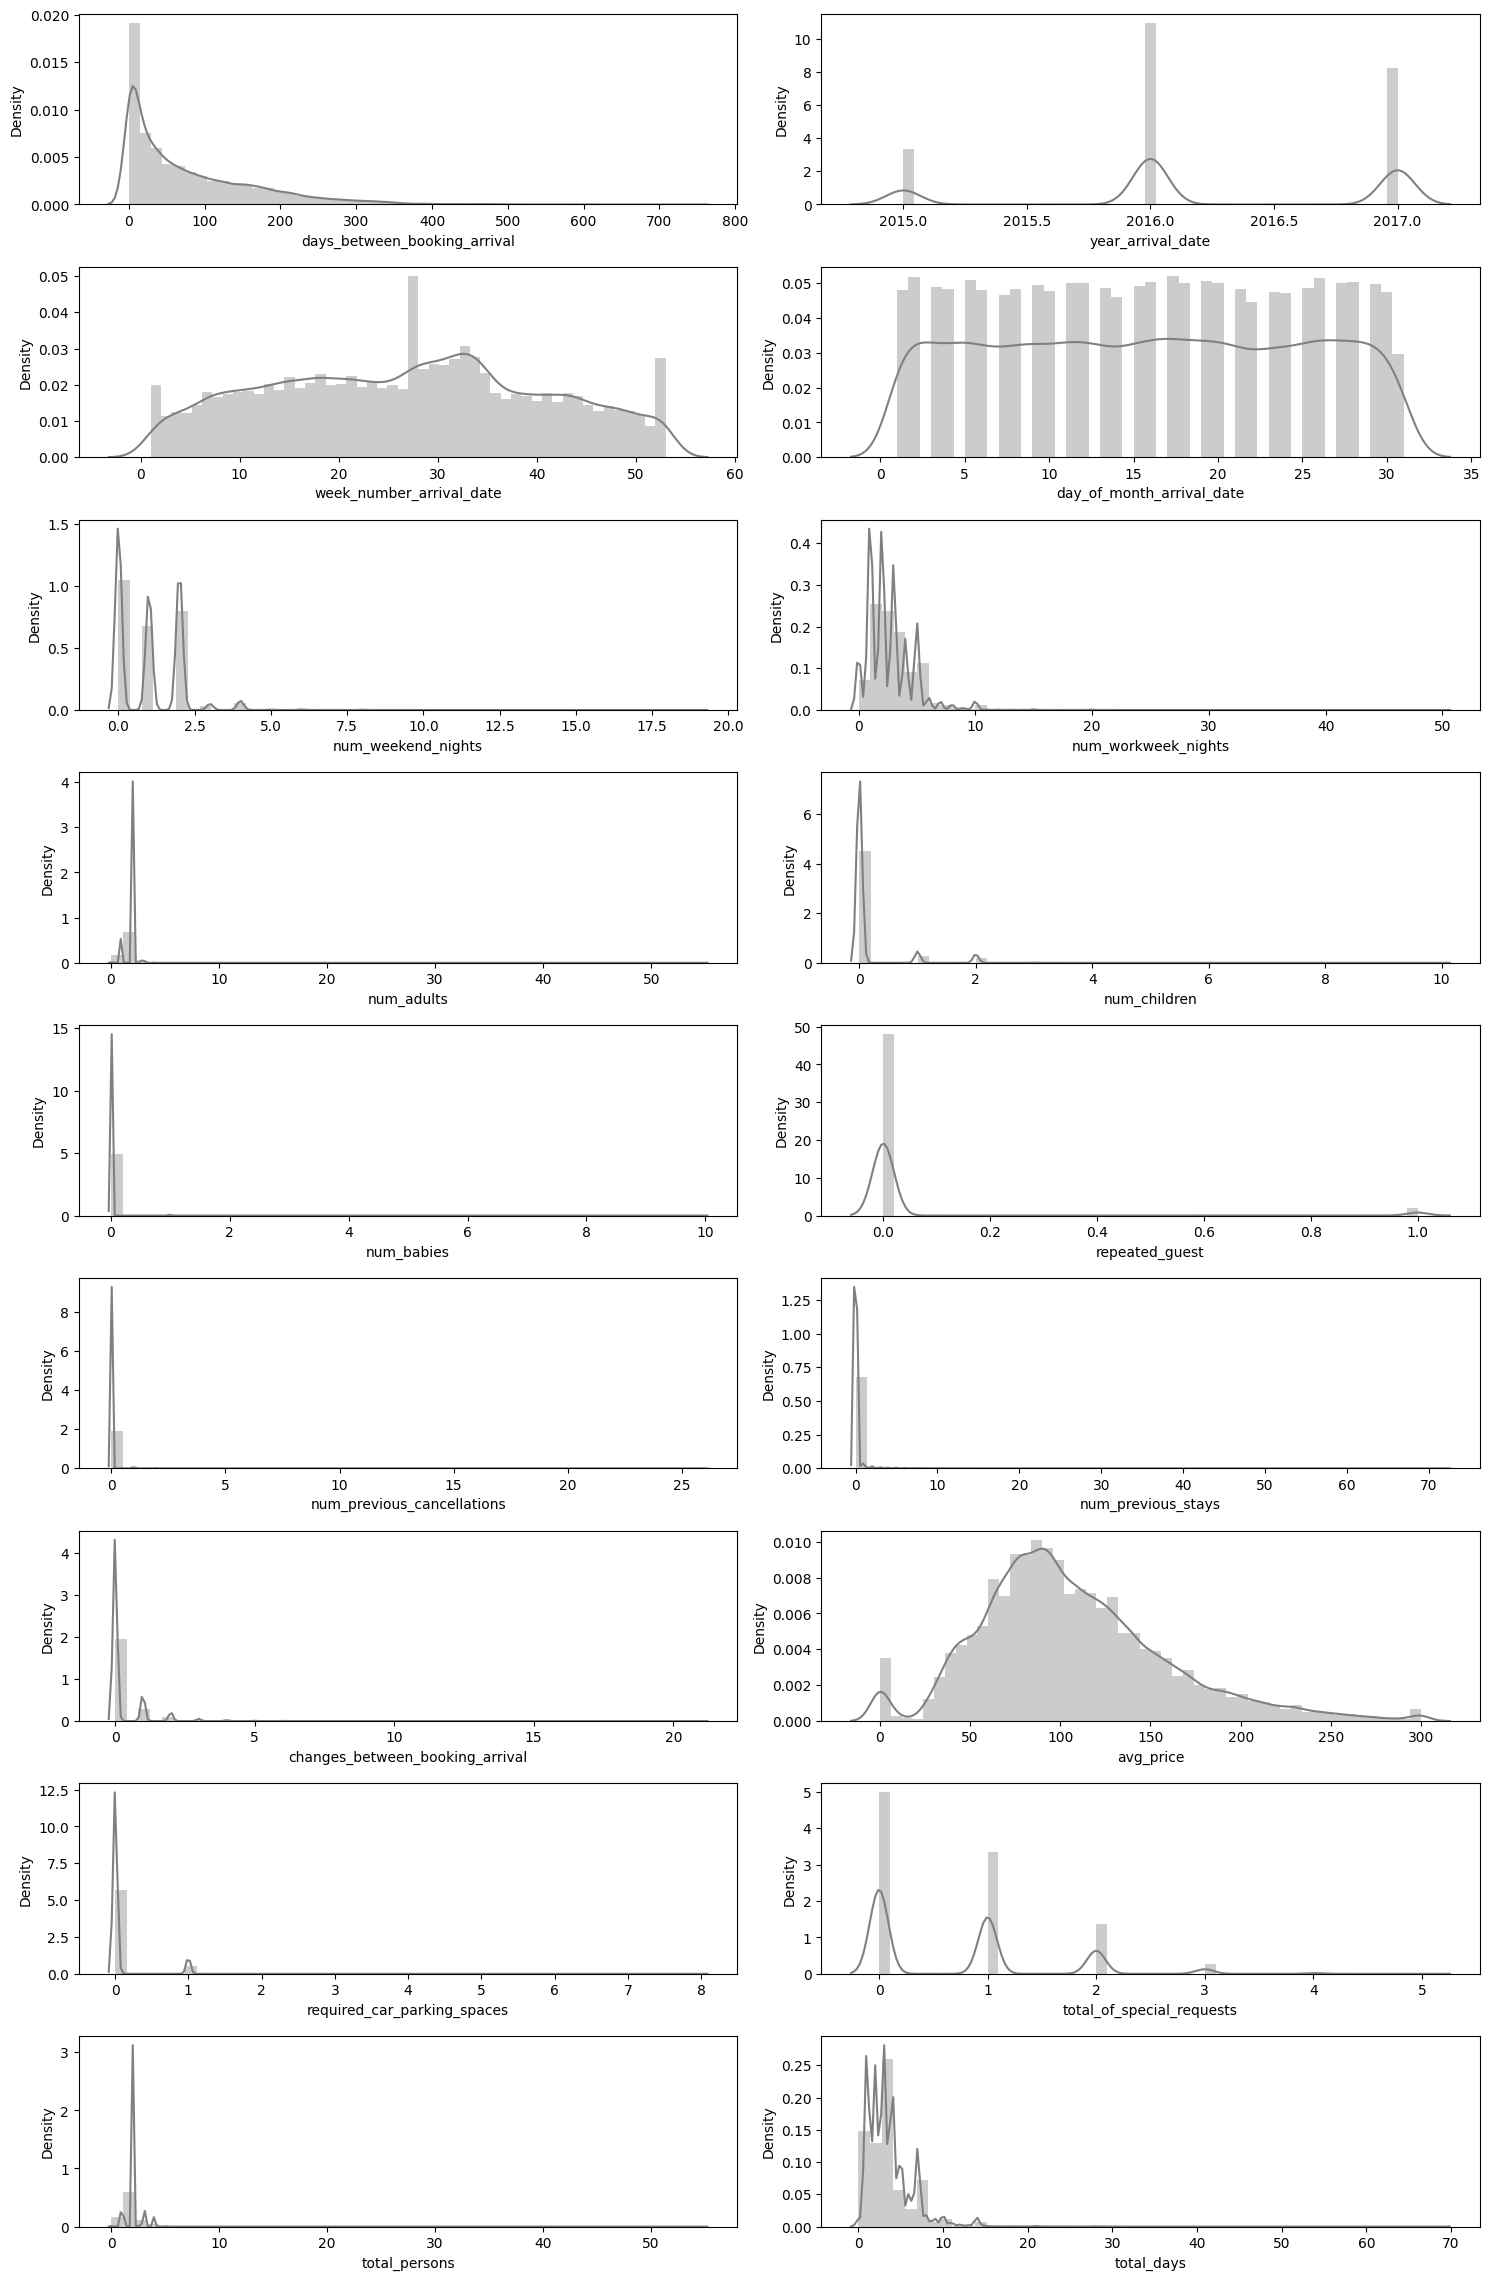

In [23]:
plt.figure(figsize=(15, 25))
for i in range(0, len(numerical)):
    plt.subplot(10, int(len(numerical)/9), i+1)
    sns.distplot(df[numerical[i]], color='gray')
    plt.tight_layout()

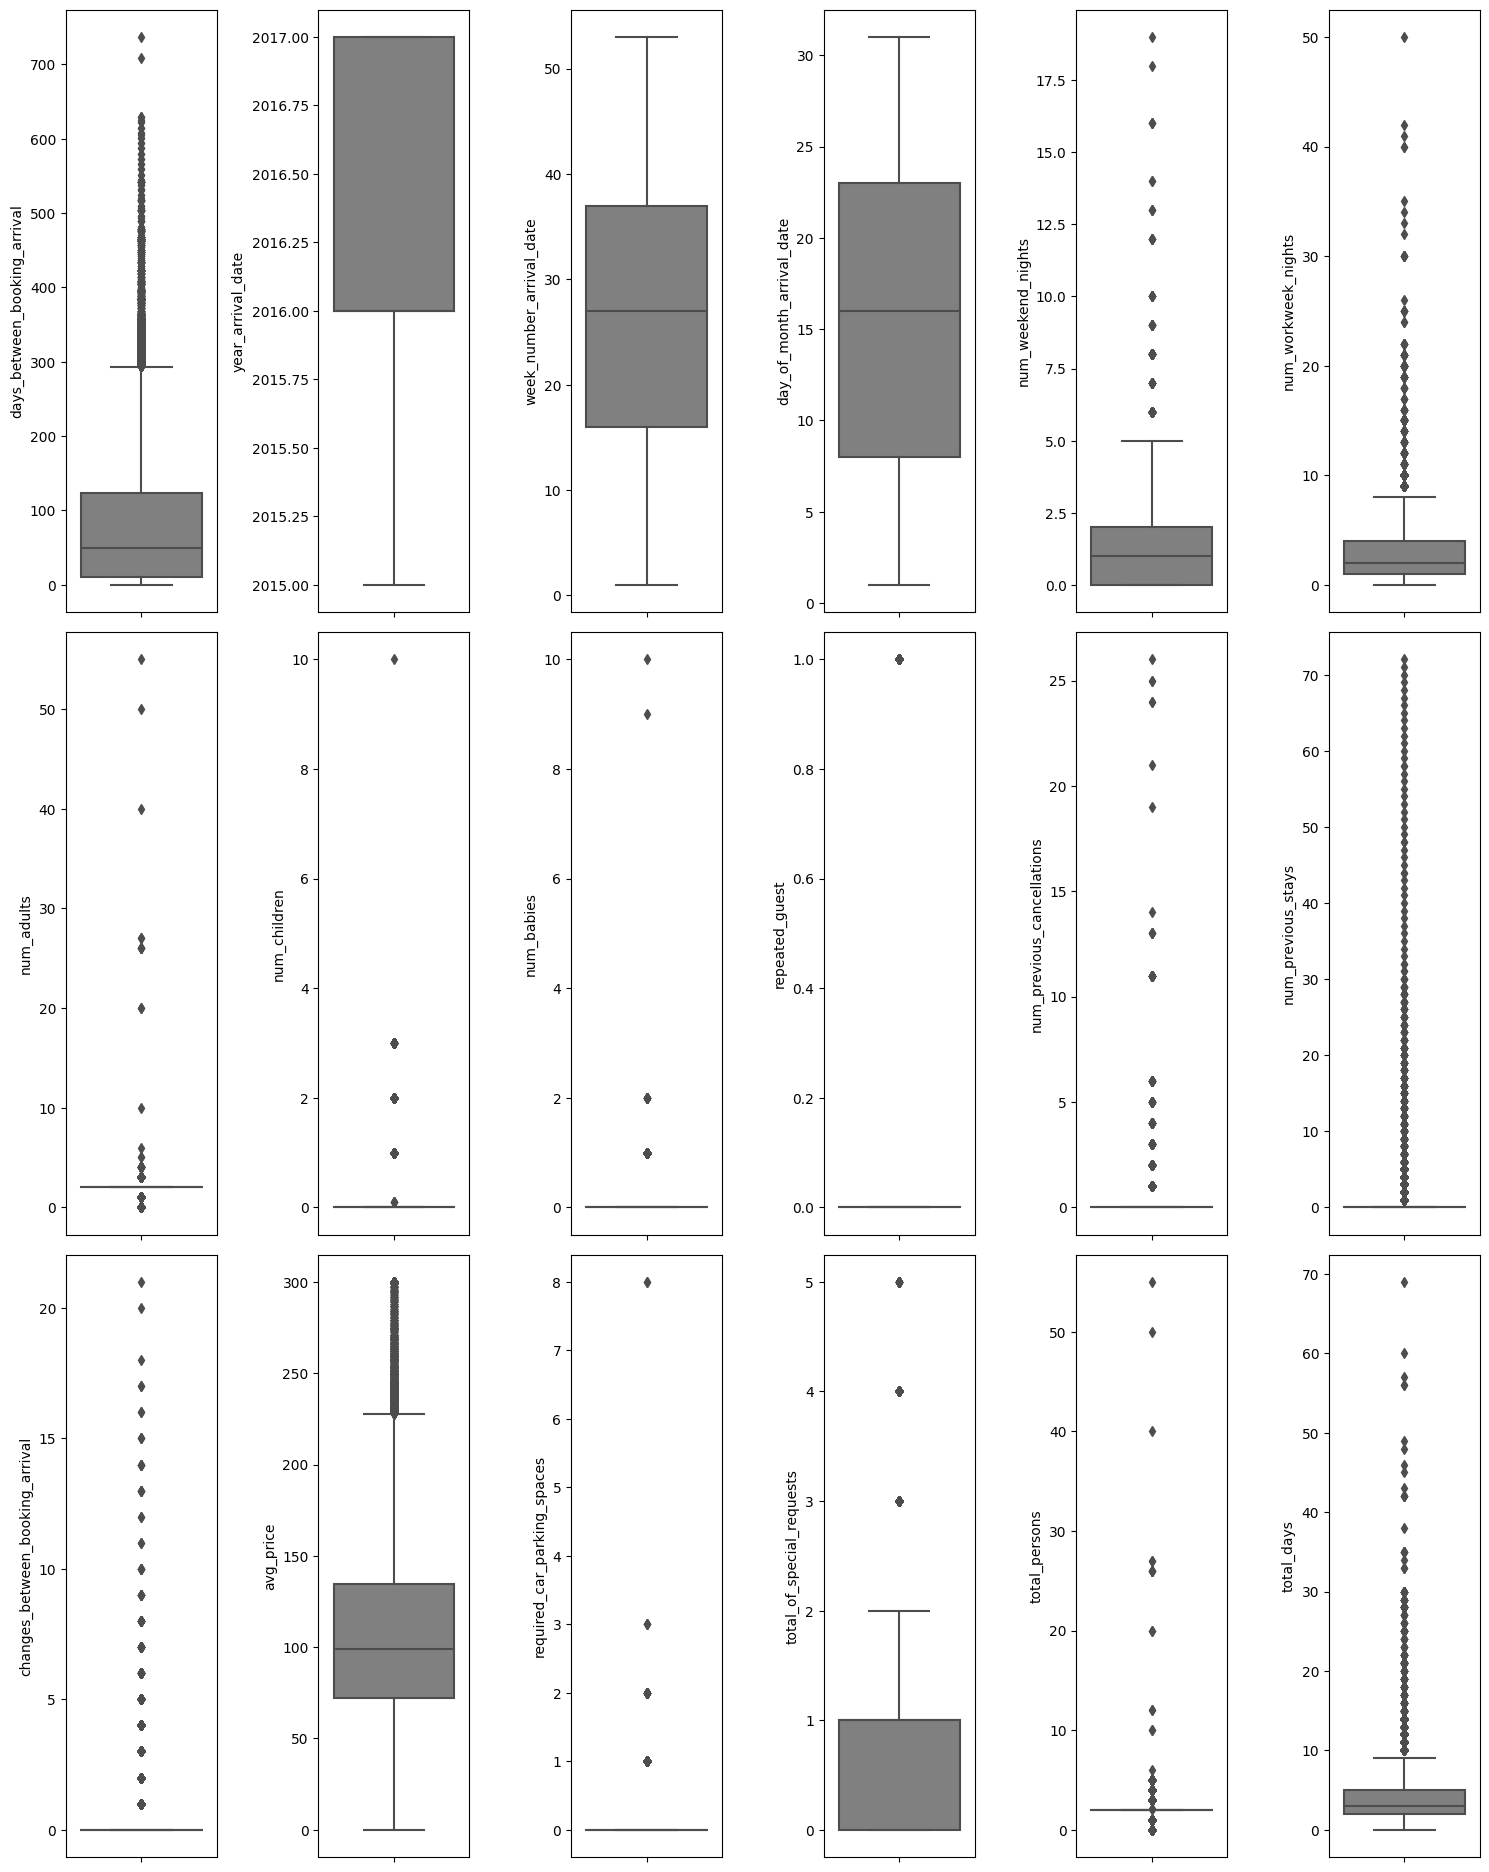

In [24]:
plt.figure(figsize=(15, 25))
for i in range(0, len(numerical)):
    plt.subplot(4, int(len(numerical)/3), i+1)
    sns.boxplot(y=df[numerical[i]], color='gray', orient='v')
    plt.tight_layout()

Heatmap

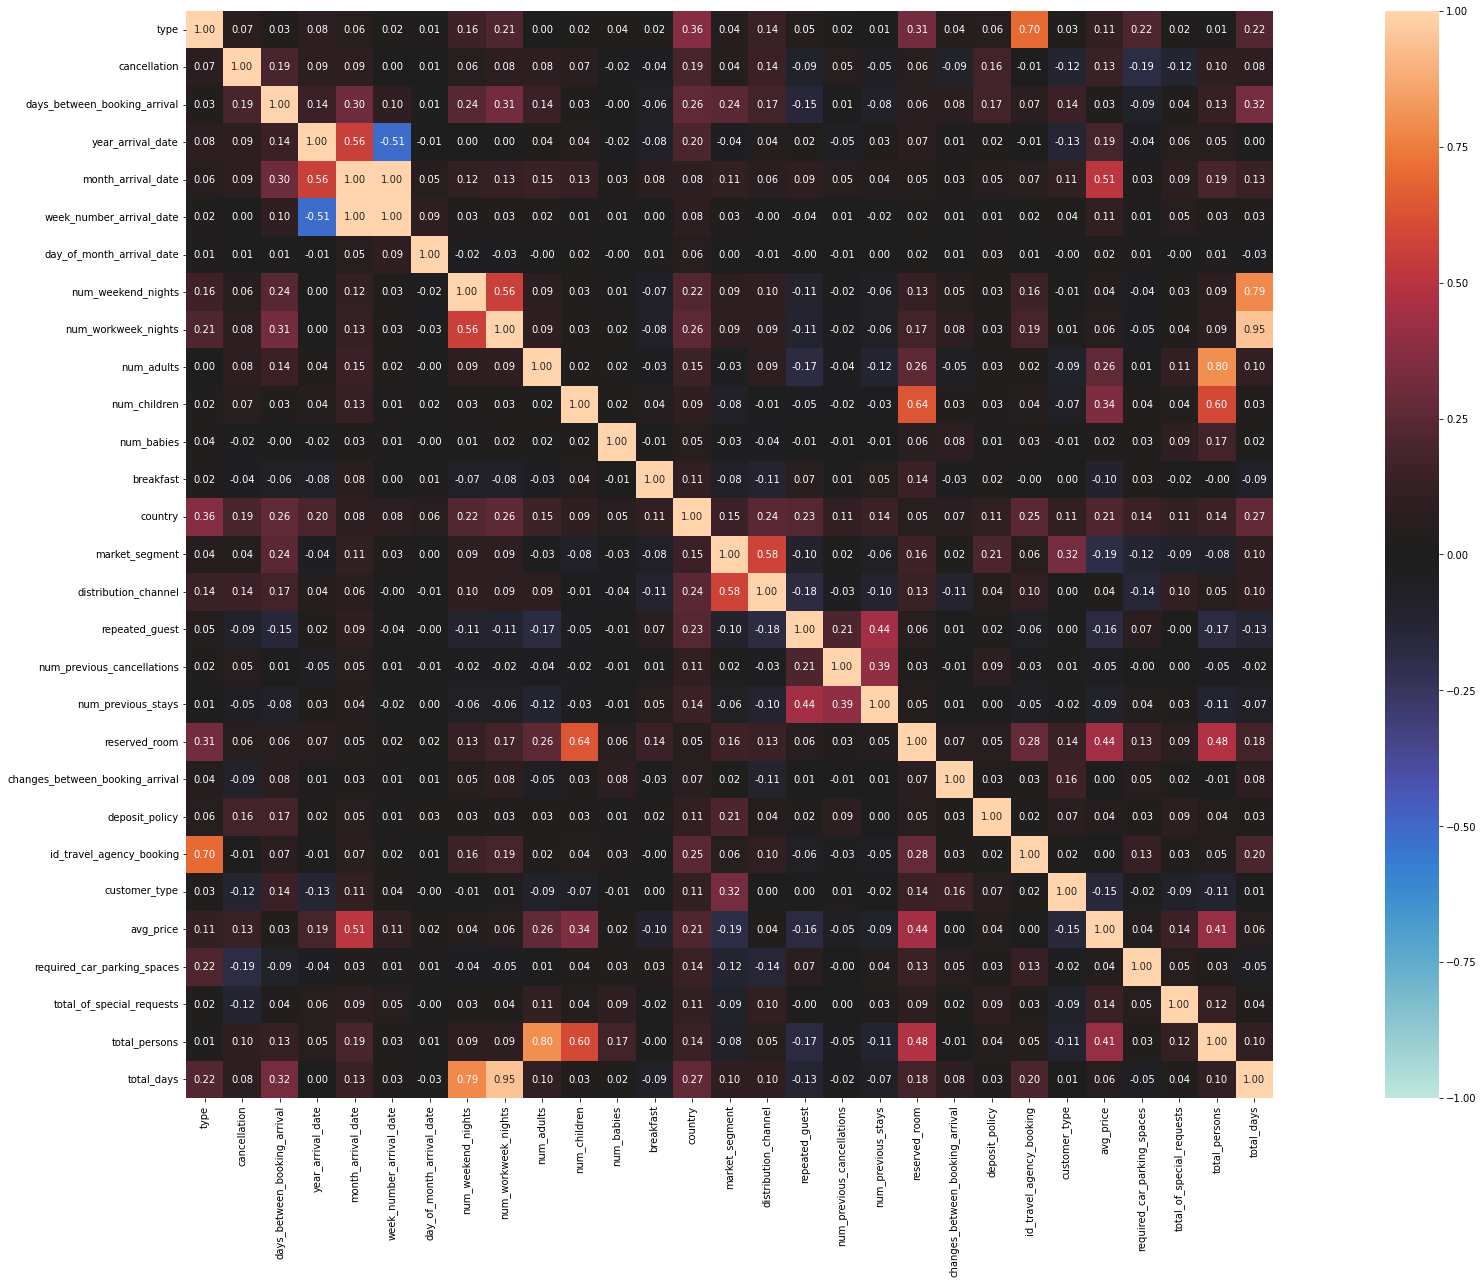

In [ ]:
associations(df, figsize = (40, 20))
plt.show()

A partir do heatmap podemos observar algumas interações importantes:
A feature id_travel_agency_booking é altamente correlacionada com type.
As features distribution_channel e market_segment se correlacionam, o que pode implicar em redundancia ao usar as duas para a construção de um modelo
A nossa variavel alvo, cancellation tem correlações pequenas, mas em sua maioria positivas com as outras features.

## Normalização de variáveis e criação de dummies

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df['days_between_booking_arrival'] = MinMaxScaler().fit_transform(df['days_between_booking_arrival'].values.reshape(len(df), 1))
df['avg_price_norm'] = MinMaxScaler().fit_transform(df['avg_price'].values.reshape(len(df), 1))
df['required_car_parking_spaces_norm'] = MinMaxScaler().fit_transform(df['required_car_parking_spaces'].values.reshape(len(df), 1))
df['total_days_norm'] = MinMaxScaler().fit_transform(df['total_days'].values.reshape(len(df), 1))
df['total_persons_norm'] = MinMaxScaler().fit_transform(df['total_persons'].values.reshape(len(df), 1))

In [ ]:
encode_cat = ['customer_type', 'reserved_room',
 'type',
 'deposit_policy']

for cat in encode_cat:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
df['breakfast'] = df['breakfast'].apply(lambda x: 1 if x == True else 0)

Observando o balanceamento da variavel alvo 

In [ ]:
df['cancellation'].value_counts()*100/len(df)

0    72.445709
1    27.554291
Name: cancellation, dtype: float64

# Modelos 

### Criando uma função para avaliar a performance dos modelos 

In [ ]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Acurácia (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precisão (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print("AUC: %.2f" % auc(fpr, tpr))

### Criando uma função para gerar matriz de confusão 

In [34]:
def print_cmatrix(ytest, pred):
    cm = confusion_matrix(ytest, pred)

    cm_df = pd.DataFrame(cm, index=['Não cancelada - Atual', 'Cancelada - Atual'],
                 columns=['Não cancelada - Prevista', 'Canceleda - Prevista'])
    
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Matriz de confusão", size=20)
    plt.xlabel('Classificação prevista')
    plt.ylabel('Classificação atual')


### Criando uma função para gerar a curva ROC

In [ ]:
def roc_g(y_test, y_pred):
  fpr, tpr, threshold = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.title('ROC')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.show()

### Separando dados em treino e teste

In [ ]:
# Split Feature and Label
X = df[['days_between_booking_arrival',
 'breakfast',
 'market_segment',
 'repeated_guest',
 'num_previous_cancellations',
 'num_previous_stays',
 'changes_between_booking_arrival',
 'id_travel_agency_booking',
 'total_of_special_requests',
 'avg_price_norm',
 'required_car_parking_spaces_norm',
 'total_days_norm',
 'total_persons_norm',
 'customer_type_0',
 'customer_type_1',
 'customer_type_2',
 'customer_type_3',
 'reserved_room_A',
 'reserved_room_B',
 'reserved_room_C',
 'reserved_room_D',
 'reserved_room_E',
 'reserved_room_F',
 'reserved_room_G',
 'reserved_room_H',
 'reserved_room_L',
 'reserved_room_P',
 'type_Fancy Hotel',
 'type_Hotel',
 'deposit_policy_No Deposit',
 'deposit_policy_Non Refund',
 'deposit_policy_Refundable']]


y = df['cancellation'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25102022)

### Modelo regressão logística 

In [45]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='liblinear')

model_lr.fit(X_train, y_train)


y_pred_lr = model_lr.predict(X_test)

In [ ]:
eval_classification(model_lr,y_pred_lr, X_train, y_train, X_test, y_test)

Acurácia (Test Set): 0.76
Precisão (Test Set): 0.68
Recall (Test Set): 0.25
F1-Score (Test Set): 0.36
AUC: 0.60


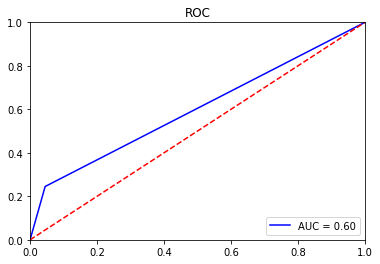

In [ ]:
roc_g(y_test, y_pred_lr)


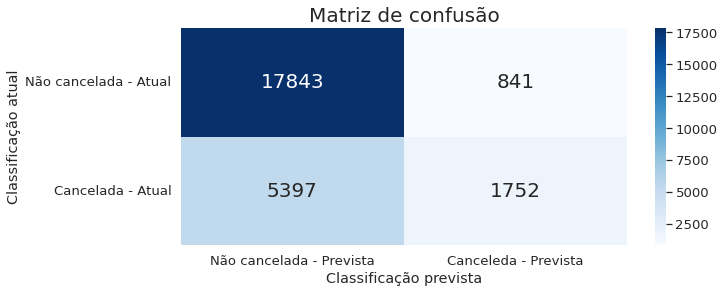

In [35]:
print_cmatrix(y_test, y_pred_lr)

### Modelo KNN (K-nearest neighbors)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_train)

In [ ]:
eval_classification(model_knn,y_pred_knn, X_train, y_train, X_test, y_test)

Acurácia (Test Set): 0.78
Precisão (Test Set): 0.63
Recall (Test Set): 0.50
F1-Score (Test Set): 0.56
AUC: 0.69


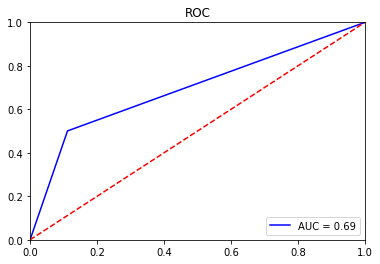

In [ ]:
roc_g(y_test, y_pred_knn)

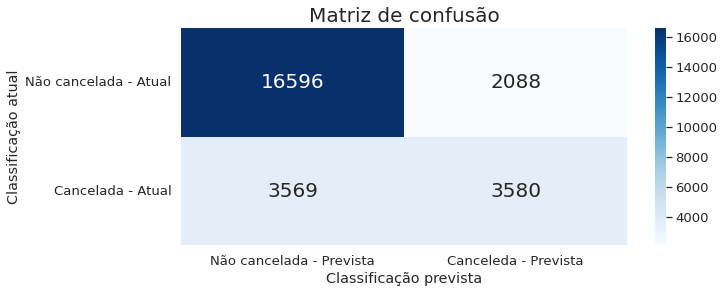

In [36]:
print_cmatrix(y_test, y_pred_knn)

### Modelo Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train,y_train)

y_pred_rf = model_rf.predict(X_test)

In [37]:
eval_classification(model_knn,y_pred_rf, X_train, y_train, X_test, y_test)

Acurácia (Test Set): 0.80
Precisão (Test Set): 0.68
Recall (Test Set): 0.53
F1-Score (Test Set): 0.60
AUC: 0.72


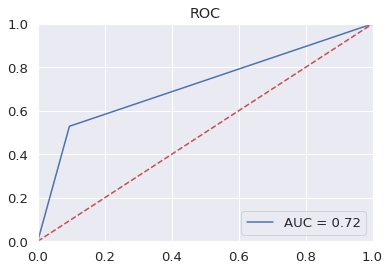

In [38]:
roc_g(y_test, y_pred_rf)

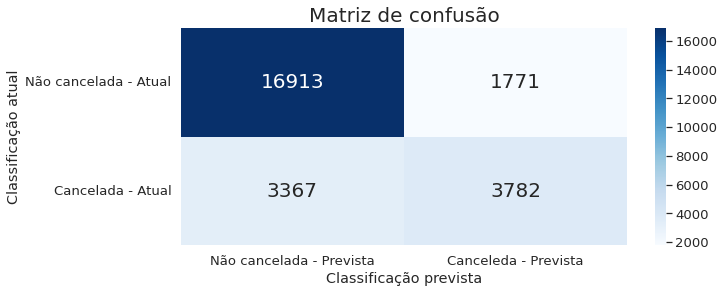

In [39]:
print_cmatrix(y_test, y_pred_rf)

### Avaliando a acurácia dos modelos 

In [40]:
acc_lr_train, acc_knn_train, acc_rf_train = model_lr.score(X_train, y_train), model_knn.score(X_train, y_train),  model_rf.score(X_train, y_train)


In [41]:
acc_lr_test, acc_knn_test, acc_rf_test = model_lr.score(X_test, y_test), model_knn.score(X_test, y_test),  model_rf.score(X_test, y_test)

In [42]:
evaluation_acc_train_test = {
    "Train" : [acc_lr_train, acc_knn_train, acc_rf_train],
    "Test": [acc_lr_test, acc_knn_test, acc_rf_test]
}

eva_sum_train_test = pd.DataFrame(data = evaluation_acc_train_test, index = ['Regressão Logistica', 'KNN',  'Random Forest'])
eva_sum_train_test

,Train,Test
Regressão Logistica,0.762762,0.758526
KNN,0.844086,0.781017
Random Forest,0.992169,0.801107


Comparando os modelos, o modelo Random Forest apresentou os melhores resultados tanto em acurácia, precisão e AUC. A partir dos resultados vamos aperfeiçoar o modelo testando os seus hiperparâmetros.

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparametros = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], #
                       bootstrap = [True], 
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)], 
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], 
                       max_features = ['auto', 'sqrt', 'log2'], 
                       n_jobs = [-1],
                      )

rf_tuned = RandomForestClassifier()
rf_tuned_model = RandomizedSearchCV(rf_tuned, hyperparametros, cv=5, scoring='accuracy')
rf_tuned_model.fit(X_train,y_train)

y_pred_rf_tuned = rf_tuned_model.predict(X_test)

In [47]:
eval_classification(rf_tuned_model, y_pred_rf_tuned, X_train, y_train, X_test, y_test)

Acurácia (Test Set): 0.82
Precisão (Test Set): 0.75
Recall (Test Set): 0.50
F1-Score (Test Set): 0.60
AUC: 0.72


In [53]:
rf_tuned_model.best_params_

{'n_jobs': -1,
 'n_estimators': 1200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 90,
 'criterion': 'gini',
 'bootstrap': True}

Utilizando os hiperparametros descritos anteriormente, chegamos ao melhor modelo de Random Forest com uma Acurácia de 0.82, precisão de 0.75 e uma AUC de 0.72